#### Importing all necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load dataset


In [2]:
df = pd.read_csv('data.csv')

#### Drop unnecessary columns

In [3]:
df = df.drop(columns=['id', 'Unnamed: 32'])

#### Convert diagnosis column to binary labels


In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

#### Split dataset into features and labels

In [5]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

#### Split dataset into training and test sets


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scale features


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Define KNN model


In [8]:
model = KNeighborsClassifier(n_neighbors=5)

#### Train model

In [9]:
model.fit(X_train, y_train)

KNeighborsClassifier()

#### Evaluate model on test set


In [10]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Test accuracy: {accuracy:.2%}')

Test accuracy: 94.74%


#### Evaluate model on train set


In [11]:
y_predtrain = model.predict(X_train)
accuracytrain = np.mean(y_predtrain == y_train)
print(f'Train accuracy: {accuracytrain:.2%}')

Train accuracy: 98.02%


#### Generate confusion matrix and heatmap of confusion matrix


Confusion matrix:
[[68  3]
 [ 3 40]]


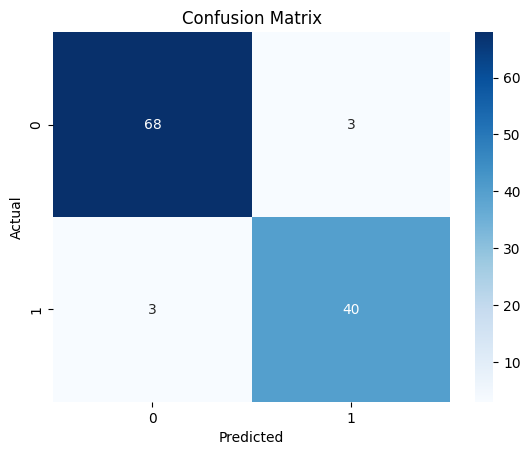

In [12]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{cm}')

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

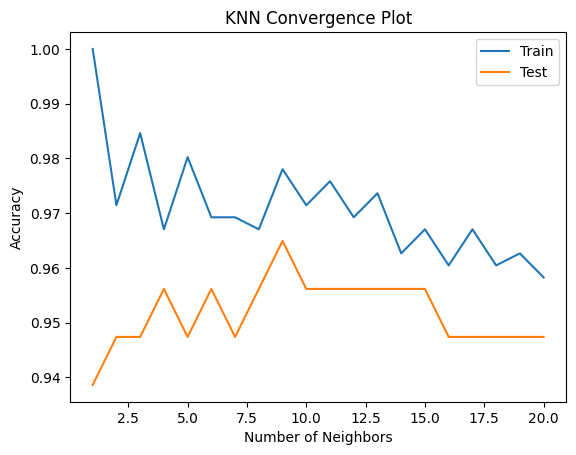

In [13]:
train_accuracies = []
test_accuracies = []
for n in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    train_acc = np.mean(model.predict(X_train) == y_train)
    test_acc = np.mean(model.predict(X_test) == y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.plot(range(1, 21), train_accuracies, label='Train')
plt.plot(range(1, 21), test_accuracies, label='Test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Convergence Plot')
plt.legend()
plt.show()

In [14]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy score: 0.9473684210526315
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

